In [54]:
import pandas as pd

In [167]:
df = pd.read_csv("titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [168]:
df['Cabin'].isna().sum() / len(df)

0.7710437710437711

In [169]:
df = df.drop(['Cabin', 'Ticket', 'Name'], axis=1)

In [170]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [171]:
df = df.dropna()
len(df)

712

In [172]:
df.isna().sum().sum()

0

In [173]:
dummy_df = pd.get_dummies(df, columns=['Pclass', 'Embarked', 'Sex'])
dummy_df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,5,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,39.0,0,5,29.1250,0,0,1,0,1,0,1,0
886,887,0,27.0,0,0,13.0000,0,1,0,0,0,1,0,1
887,888,1,19.0,0,0,30.0000,1,0,0,0,0,1,1,0
889,890,1,26.0,0,0,30.0000,1,0,0,1,0,0,0,1


### ANALYSIS

In [174]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

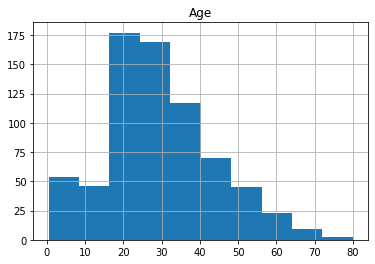

In [175]:
df.hist('Age')

In [176]:
df.Age.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Age COMMENTARY

array([[<AxesSubplot:title={'center':'SibSp'}>]], dtype=object)

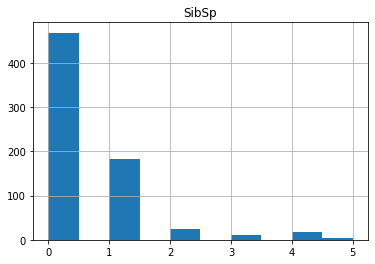

In [177]:
df.hist('SibSp')

In [178]:
df.SibSp.describe()

count    712.000000
mean       0.514045
std        0.930692
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        5.000000
Name: SibSp, dtype: float64

#### Siblings / Spouses COMMENTARY

array([[<AxesSubplot:title={'center':'Parch'}>]], dtype=object)

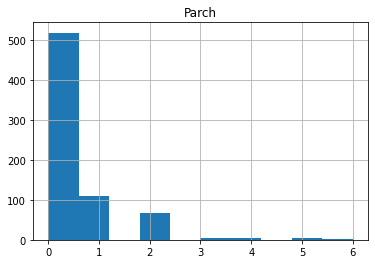

In [179]:
df.hist('Parch')

In [180]:
df.Parch.describe()

count    712.000000
mean       0.432584
std        0.854181
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        6.000000
Name: Parch, dtype: float64

#### Parent / Children Commentary

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

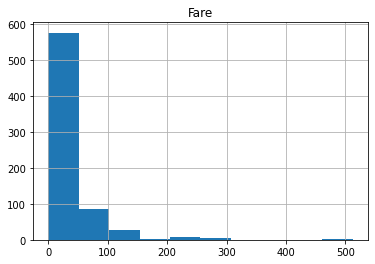

In [181]:
df.hist('Fare')

In [182]:
df.Fare.describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

#### Commentary

<AxesSubplot:>

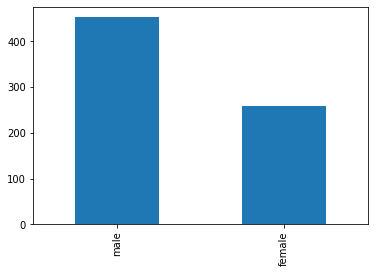

In [183]:
df.Sex.value_counts().plot(kind='bar')

#### Sex Commentary

<AxesSubplot:>

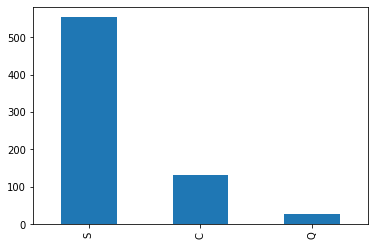

In [184]:
df.Embarked.value_counts().plot(kind='bar')

#### Embarked Commentary

In [185]:
import numpy as np
from scipy import stats
zscore_df = np.abs(stats.zscore(dummy_df))
zscore_df = zscore_df.drop(['PassengerId','Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1)

In [186]:
zscore_df

,Survived,Age,SibSp,Parch,Fare
0,0.824163,0.527669,0.522511,0.506787,0.516380
1,1.213352,0.577094,0.522511,0.506787,0.694046
2,1.213352,0.251478,0.552714,0.506787,0.503620
3,1.213352,0.369951,0.522511,0.506787,0.350326
4,0.824163,0.369951,0.552714,0.506787,0.501257
...,...,...,...,...,...
885,0.824163,0.646142,0.552714,5.350885,0.102875
886,0.824163,0.182430,0.552714,0.506787,0.407687
887,1.213352,0.734812,0.552714,0.506787,0.086335
889,1.213352,0.251478,0.552714,0.506787,0.086335


In [187]:
new_df = pd.DataFrame({'values': zscore_df.iloc[:].sum(axis=1)/len(zscore_df.columns)})

In [188]:
new_df

,values
0,0.579502
1,0.702758
2,0.605590
3,0.592585
4,0.550975
...,...
885,1.495356
886,0.494756
887,0.618800
889,0.522133


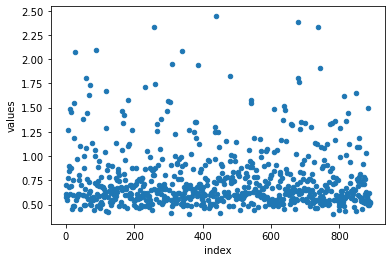

In [189]:
new_df.reset_index().plot.scatter(x='index', y = 'values');

In [190]:
df['zscore'] = new_df

In [191]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,zscore
0,1,0,3,male,22.0,1,0,7.2500,S,0.579502
1,2,1,1,female,38.0,1,0,71.2833,C,0.702758
2,3,1,3,female,26.0,0,0,7.9250,S,0.605590
3,4,1,1,female,35.0,1,0,53.1000,S,0.592585
4,5,0,3,male,35.0,0,0,8.0500,S,0.550975
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q,1.495356
886,887,0,2,male,27.0,0,0,13.0000,S,0.494756
887,888,1,1,female,19.0,0,0,30.0000,S,0.618800
889,890,1,1,male,26.0,0,0,30.0000,C,0.522133


In [192]:
df[df.zscore > 2.25]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,zscore
258,259,1,1,female,35.0,0,0,512.3292,C,2.334794
438,439,0,1,male,64.0,1,4,263.0000,S,2.443288
679,680,1,1,male,36.0,0,1,512.3292,C,2.380196
737,738,1,1,male,35.0,0,0,512.3292,C,2.334794


In [193]:
df[df.Fare > 250]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,zscore
27,28,0,1,male,19.0,3,2,263.0000,S,2.077259
88,89,1,1,female,23.0,3,2,263.0000,S,2.099859
258,259,1,1,female,35.0,0,0,512.3292,C,2.334794
311,312,1,1,female,18.0,2,2,262.3750,C,1.951499
341,342,1,1,female,24.0,3,2,263.0000,S,2.086049
438,439,0,1,male,64.0,1,4,263.0000,S,2.443288
679,680,1,1,male,36.0,0,1,512.3292,C,2.380196
737,738,1,1,male,35.0,0,0,512.3292,C,2.334794
742,743,1,1,female,21.0,2,2,262.3750,C,1.910070


In [194]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,zscore
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655,-0.034679
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100,0.190850
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893,-0.159166
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,-0.087336
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860,0.563231
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624,0.652539
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000,0.620600
zscore,-0.034679,0.190850,-0.159166,-0.087336,0.563231,0.652539,0.620600,1.000000


# REGRESSION

In [336]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [337]:
X = dummy_df.drop('Survived', axis=1)
y = dummy_df.Survived

split = np.random.rand(len(X)) < 0.8

X_train = X[split]
X_test = X[~split]

y_train = y[split]
y_test = y[~split]
 
regr = LogisticRegression(random_state=0, max_iter=1000)
 
regr.fit(X_train, y_train)
predict = regr.predict(X_test)

(predict == y_test).sum() / len(predict)

0.823943661971831